# Max lateness

Was ist die Laufzeit des greedy-Algorithmus' für *max lateness*? Wir implementieren einfache Zufallsinstanzen, den greedy-Algorithmus und nehmen dann Laufzeiten auf. Dazu importieren wir zunächst einige Standardpakete, die oftmals (und insbesondere in Google Colab) bereits vorinstalliert sind. 

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # scientific computing
import random # Zufallszahlen
import time # Zeitmessung
plt.style.use("ggplot") # damit die plots ein wenig hübscher aussehen

Als erstes schreiben wir eine Funktion, um Zufallsinstanzen zu erzeugen. Jede Instanz ist durch eine Liste von Paaren $d_i,f_i$ dargestellt, wobei $d_i$ die Dauer des Auftrags $i$ ist und $f_i$ die zugehörige Frist.

In [2]:
def random_instance(n):
    d=[random.randint(1,10) for _ in range(n)]
    f=[random.randint(0,3*n) for _ in range(n)]
    return [(d[i],f[i]) for i in range(n)]

In [3]:
instance=random_instance(10)
instance

[(6, 24),
 (7, 19),
 (7, 6),
 (7, 26),
 (3, 1),
 (9, 30),
 (7, 21),
 (5, 18),
 (3, 21),
 (7, 16)]

Als nächstes der *greedy*, der denkbar einfach ist: Die Instanzen werden einfach nach aufsteigender Frist sortiert. Python kann von Haus aus sortieren, und zwar mit der Funktion <code>sorted</code>, die eine sortierte Liste zurück gibt. Mit dem Schlüsselwort <code>key</code> kann beeinflusst werden, wonach sortiert wird. In diesem Fall wollen wir nach den Fristen sortieren, dem zweiten Teil in jedem Paar in der Instanzenliste. Wir nutzen dabei ein wenig Python-Magie: <code>lambda</code>-Funktionen. Dies ist eine Möglichkeit Funktionen sehr kurz zu definieren. Der Code <code>lambda item:item[1]</code> definiert eine Funktion, die ein Argument erwartet, <code>item</code>, das aus einem Tupel besteht und dessen zweites Element als Ergebnis liefert. (Python fängt bei 0 an zu zählen, so dass <code>item[1]</code> das zweite Element in <code>item</code> bezeichnet.)

Wir definieren ebenfalls eine Funktion <code>lateness</code>, die die größte Verspätung berechnet. 

In [4]:
def greedy(instance):
    tuples=[]
    sorted_tuples=sorted(instance,key=lambda item: item[1])
    return sorted_tuples

def lateness(instance):
    n=len(instance)
    finished_time=[sum([di for di,fi in instance[:i+1]]) for i in range(n)]
    L=max([max(0,finished_time[i]-instance[i][1]) for i in range(n) ])
    return L

Probieren wir den *greedy* aus!

In [5]:
greedy_solution=greedy(instance)
L=lateness(greedy_solution)
print("Greedy resultiert in max. Verspätung: {}".format(L))
greedy_solution

Greedy resultiert in max. Verspätung: 31


[(3, 1),
 (7, 6),
 (7, 16),
 (5, 18),
 (7, 19),
 (7, 21),
 (3, 21),
 (6, 24),
 (7, 26),
 (9, 30)]

## Laufzeit

Gucken wir uns die Laufzeiten des *greedy* an. Die Funktion <code>run_greedy</code> wiederholt sich <code>repeats</code> oft, erzeugt dabei jeweils eine Zufallsinstanz und wendet dann den *greedy* darauf an. Die Laufzeit des *greedy* wird festgehalten (sowie der Zielfunktionswert, den wir aber im folgenden nicht mehr verwenden werden) und in der Liste <code>result</code> gespeichert. 

In [6]:
def run_greedy(n,repeats,result):
    for _ in range(repeats):
        instance=random_instance(n)
        start=time.time()
        greedy_solution=greedy(instance)
        greedy_lateness=lateness(instance)
        running_time=time.time()-start
        result.append((n,greedy_lateness,running_time))

Wir plotten nun die resultierenden Laufzeiten.

total time elapsed: 174.67s


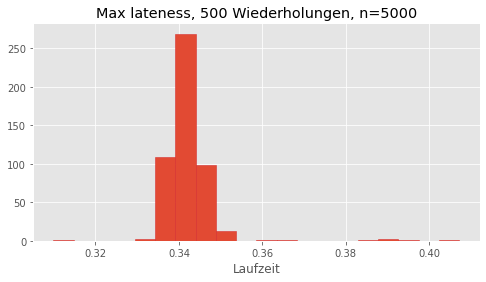

In [7]:
start_total=time.time()
result=[]
n=5000
repeats=500
run_greedy(n,repeats,result)
result=np.array(result)
_,ax=plt.subplots(figsize=(8,4))  # erzeuge einen Plot
ax.hist(result[:,2],bins=20,edgecolor='tab:red')  # plotte ein Histogramm
ax.set_xlabel("Laufzeit")
ax.set_title("Max lateness, {} Wiederholungen, n={}".format(repeats,n))
plt.savefig("lateness_hist.png",dpi=300) # speichern des Plots
total_time=time.time()-start_total
print("total time elapsed: {}s".format(round(total_time,2)))

Was beobachten wir? Natürlich sind die Laufzeiten nicht immer vollständig identisch. Das kann an vielen Umständen liegen. Möglicherweise läuft bei der einen Ausführung ein Hintergrundprozess ab (das Betriebssystem beschließt ein wenig den Speicher aufzuräumen oder muss mit dem WLAN kommunizieren) und bei der anderen nicht. Bei manchen Instanzen braucht einfach die Sortierung weniger Zeit, vielleicht weil ein Teil zufällig bereits in Reihenfolge ist. 

Wir plotten nun die Laufzeit mit steigender Instanzgröße.

total time elapsed: 238.17s


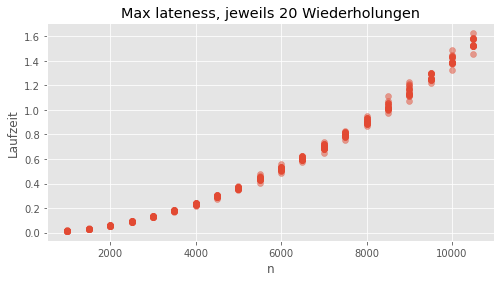

In [8]:
start_total=time.time()
repeats=20
result=[]
N=[1000+500*i for i in range(20)]
for n in N:
    run_greedy(n,repeats,result)

result=np.array(result)
total_time=time.time()-start_total
print("total time elapsed: {}s".format(round(total_time,2)))

_,ax=plt.subplots(figsize=(8,4))
ax.scatter(result[:,0],result[:,2],alpha=0.5)
ax.set_xlabel("n")
ax.set_ylabel("Laufzeit")
ax.set_title("Max lateness, jeweils {} Wiederholungen".format(repeats))
plt.savefig("lateness_hist.png",dpi=300)

Für jedes $n$, d.h. für jede Instanzgröße, haben wir nun mehrere Laufzeiten, nämlich eine pro Wiederholung. In der Laufzeitanalyse wollen wir diese zu einem Datenpunkt pro $n$ zusammenfassen. Dafür gibt es mehrere sinnvolle Optionen. Die beiden naheliegensten sind: Wir bilden jeweils den Durchschnitt oder wir nehmen jeweils das Maximum. Beides plotten wir unten.

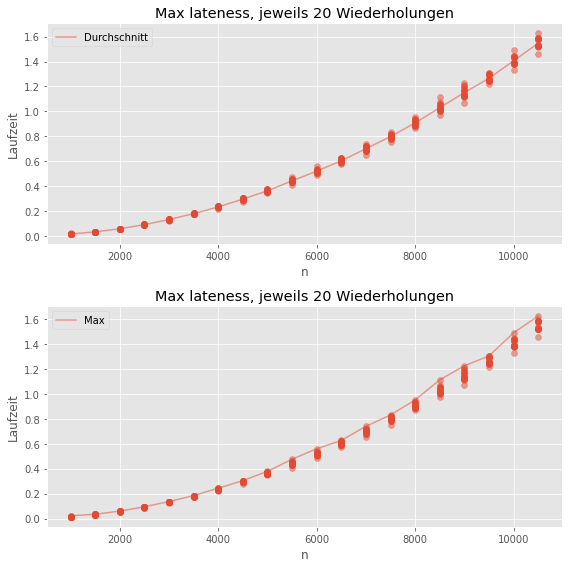

In [10]:
_,axs=plt.subplots(2,1,figsize=(8,8))
axs[0].scatter(result[:,0],result[:,2],alpha=0.5)
number_of_n=len(result)//repeats
means=np.array([ (result[i*repeats,0],result[i*repeats:(i+1)*repeats,2].mean()) for i in range(number_of_n) ])
axs[0].plot(means[:,0],means[:,1],alpha=0.5,label="Durchschnitt")
axs[0].set_xlabel("n")
axs[0].set_ylabel("Laufzeit")
axs[0].legend()
axs[0].set_title("Max lateness, jeweils {} Wiederholungen".format(repeats))

axs[1].scatter(result[:,0],result[:,2],alpha=0.5)
maxs=np.array([ (result[i*repeats,0],result[i*repeats:(i+1)*repeats,2].max()) for i in range(number_of_n) ])
axs[1].plot(maxs[:,0],maxs[:,1],alpha=0.5,label="Max")
axs[1].set_xlabel("n")
axs[1].set_ylabel("Laufzeit")
axs[1].legend()
axs[1].set_title("Max lateness, jeweils {} Wiederholungen".format(repeats))
plt.tight_layout()
plt.savefig("lateness_hist2.png",dpi=300)

In der Theorie steht man vor dem gleichen Problem: Unterschiedliche Instanzen der gleichen Größe $n$ können auch theoretisch unterschiedlich lange Laufzeiten haben. Wie also zusammenfassen? Oftmals wird eine **worst case analysis** angewandt: wir nehmen das Maximum.